In [1]:
import numpy as np
from scipy.stats import gamma
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
plt.style.use("ggplot")

# ガンマ分布でオイラー法とリープフロック法を試す
- 同じハミルトニアン（等高線が同じ線）の移動を行う。等高線間の遷移は行わない

$Gamma(\theta|k,\lambda)\propto \theta^{k-1}\exp(-\lambda \theta)$

In [3]:
eps = 1e-2  # 移動距離。微分の微少量dtのこと
lam = 1  # ガンマ分布のパラメータ
k = 11  # ガンマ分布のパラメータ
NMCS = 10000  # step数

## ハミルトニアンと正準方程式

$H = \frac{1}{2} p^2 - (k-1)\log\theta + \lambda \theta$

$\frac{d\theta}{dt} = p$

$\frac{dp}{dt} = (k-1)\frac{1}{\theta} - \lambda$

In [4]:
# pの正準方程式

f = lambda x, lam, k : (k-1) / x - lam

C:\Users\yokoi.shingo\Anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """


<a list of 4 text.Text objects>

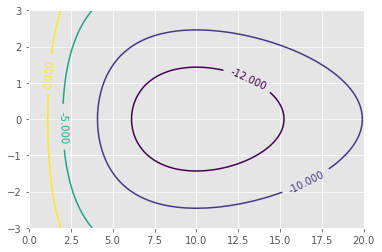

In [5]:
# 2次元のガンマ分布の可視化

x, y = np.linspace(0, 20, 100), np.linspace(-3, 3, 100)
X, Y = np.meshgrid(x, y)
CS = plt.contour(
    X, Y, 0.5 * Y ** 2 - (k - 1) * np.log(X) + lam * X, levels=[-12, -10, -5, 0]
)
plt.clabel(CS, inline=1, fontsize=10)

In [6]:
def euler(q, p, eps, lam, k, f):
    """オイラー法"""
    q_new = q + eps * p
    p_new = p + eps * f(q, lam, k)
    q, p = q_new, p_new
    return q, p

In [8]:
# オイラー法実行

q, p = 4.0, 0.0
euler_arr = np.zeros([NMCS, 2])
euler_arr[0,0] = q
euler_arr[0,1] = p
for i in range(1,NMCS):
    q, p = euler(q, p, eps, lam, k, f)
    euler_arr[i,0], euler_arr[i,1] = q, p
df_euler = pd.DataFrame(euler_arr, columns=["q","p"])

C:\Users\yokoi.shingo\Anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  


<a list of 4 text.Text objects>

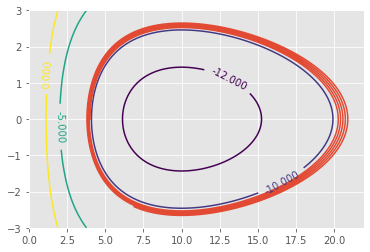

In [9]:
# 赤線太く拡散していることがわかる

plt.plot(df_euler["q"], df_euler["p"])
CS = plt.contour(X, Y, 0.5 * Y ** 2 - (k-1)*np.log(X) + lam * X, levels = [-12, -10, -5, 0])
plt.clabel(CS, inline=1, fontsize=10)

In [10]:
def leap_flog(q, p, eps, lam, k, f):
    """リープフロッグ法"""
    p_new = p + 0.5 * eps * f(q, lam, k)  # 半分だけp更新
    q_new = q + eps * p_new  # q更新
    p_new = p_new + 0.5 * eps * f(q_new, lam, k)  # 1歩先p更新
    q, p = q_new, p_new
    return q, p

In [11]:
# リープフロッグ法計算

q, p = 4.0, 0.0
lf_arr = np.zeros([NMCS, 2])
lf_arr[0,0] = q
lf_arr[0,1] = p
for i in range(1,NMCS):
    q, p = leap_flog(q, p, eps, lam, k, f)
    lf_arr[i,0], lf_arr[i,1] = q, p
df_lf = pd.DataFrame(lf_arr, columns=["q","p"])

C:\Users\yokoi.shingo\Anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  


<a list of 4 text.Text objects>

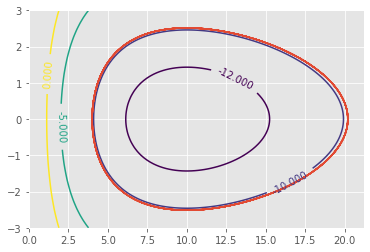

In [12]:
# 赤線細く数値誤差が拡散していないことがわかる

plt.plot(df_lf["q"], df_lf["p"])
CS = plt.contour(X, Y, 0.5 * Y ** 2 - (k-1)*np.log(X) + lam * X, levels = [-12, -10, -5, 0])
plt.clabel(CS, inline=1, fontsize=10)